# Bank Marketing Campaign Analysis

## Introduction
This project analyzes the effectiveness of direct marketing campaigns by a Portuguese banking institution. The goal is to predict whether a client will subscribe to a term deposit based on various features. The analysis follows the CRISP-DM framework, including data understanding, data preparation, exploratory data analysis (EDA), modeling, and findings.

## Data Understanding
First, we load and inspect the dataset to understand its structure and content.

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('data/bank-additional-full.csv', delimiter=';')

# Display the first few rows of the dataset
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2]:
# Display summary statistics
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [3]:
# Check for missing values
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Data Preparation
Handle missing values, convert data types, and perform feature engineering to prepare the data for analysis.

In [4]:
# Handling missing values
# There are no missing values in this dataset, as seen in the previous step

# Converting data types if necessary
# Example: If there are any categorical variables that need to be encoded

# Feature engineering
# Creating a new feature 
data['age_group'] = pd.cut(data['age'], bins=[18, 25, 35, 45, 55, 65, 75, 85, 95], labels=['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85-94'])

# Dropping unnecessary columns if any
# Example: Dropping 'duration' as it is not known before the call and affects target variable

data.drop(['duration'], axis=1, inplace=True)

# Display the cleaned data
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,55-64
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,55-64
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,35-44
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,35-44
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,55-64


## Exploratory Data Analysis (EDA)
We use various visualizations to understand the distribution and relationships in the data.

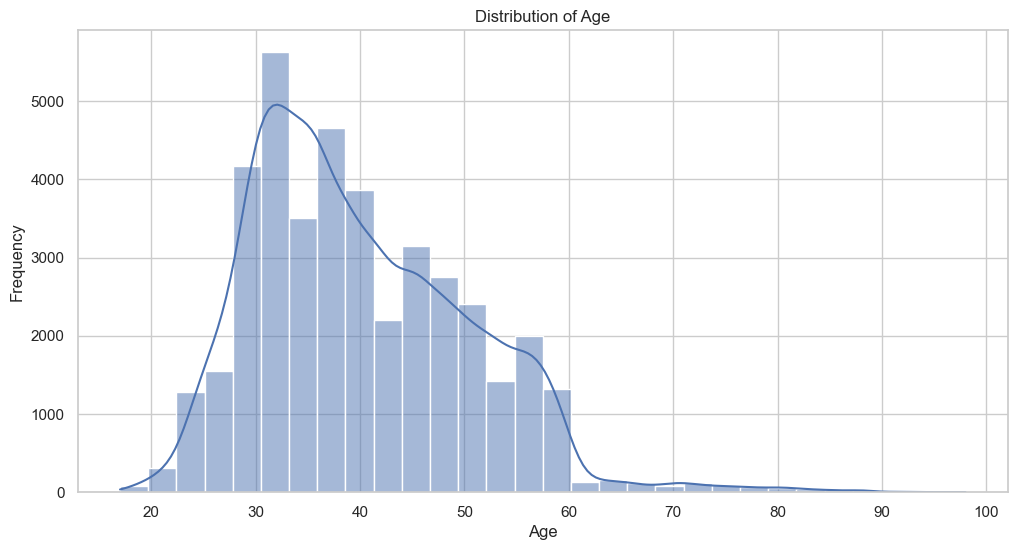

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set(style="whitegrid")

# Distribution of Age
plt.figure(figsize=(12, 6))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Distribution of Age

- **Description**: The age distribution of clients shows a significant concentration of individuals between the ages of 20 and 60, with a peak around the age of 30.
- **Insight**: The bank marketing efforts are primarily reaching young to middle-aged adults, with the highest number of contacts being in their early 30s.


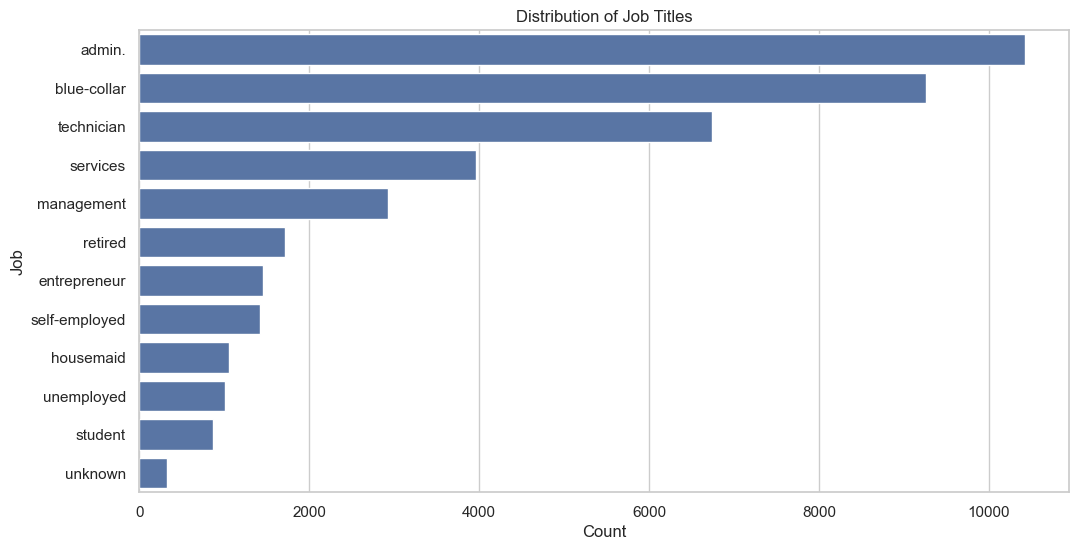

In [6]:
# Bar plot of Job
plt.figure(figsize=(12, 6))
sns.countplot(y='job', data=data, order=data['job'].value_counts().index)
plt.title('Distribution of Job Titles')
plt.xlabel('Count')
plt.ylabel('Job')
plt.show()

## Distribution of Job Titles

- **Description**: The bar plot displays the frequency of different job titles among the clients.
- **Insight**: The majority of clients are employed in administrative, blue-collar, and technical roles. The marketing strategy is effectively reaching a wide range of occupations, with a notable focus on those in admin and blue-collar jobs.

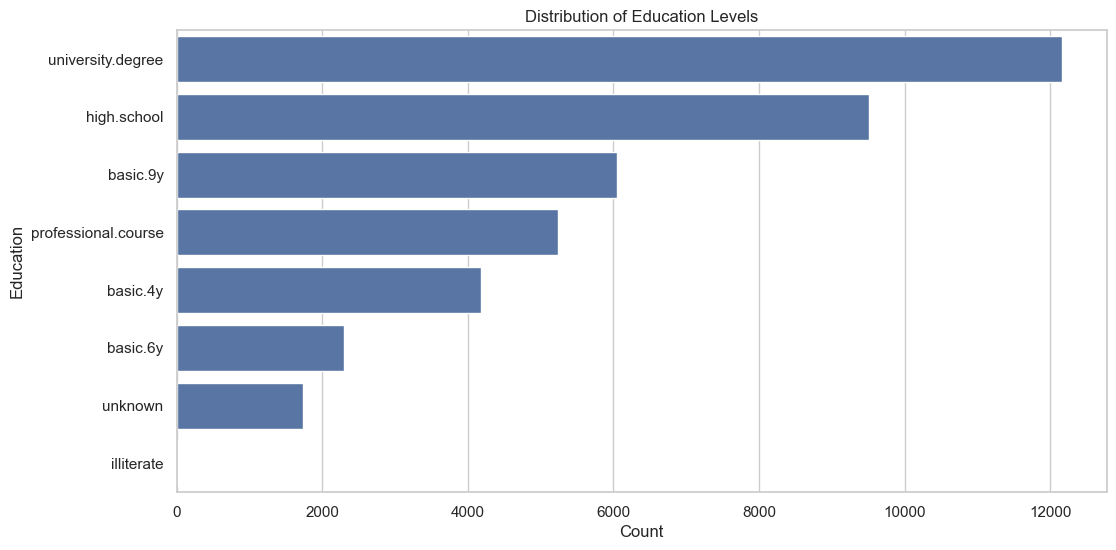

In [7]:
# Bar plot of Education
plt.figure(figsize=(12, 6))
sns.countplot(y='education', data=data, order=data['education'].value_counts().index)
plt.title('Distribution of Education Levels')
plt.xlabel('Count')
plt.ylabel('Education')
plt.show()

## Distribution of Education Levels

- **Description**: The education level distribution shows that most clients have either a university degree or high school education.
- **Insight**: A significant portion of the bank's clients are well-educated, suggesting that marketing content should be tailored to resonate with this demographic.

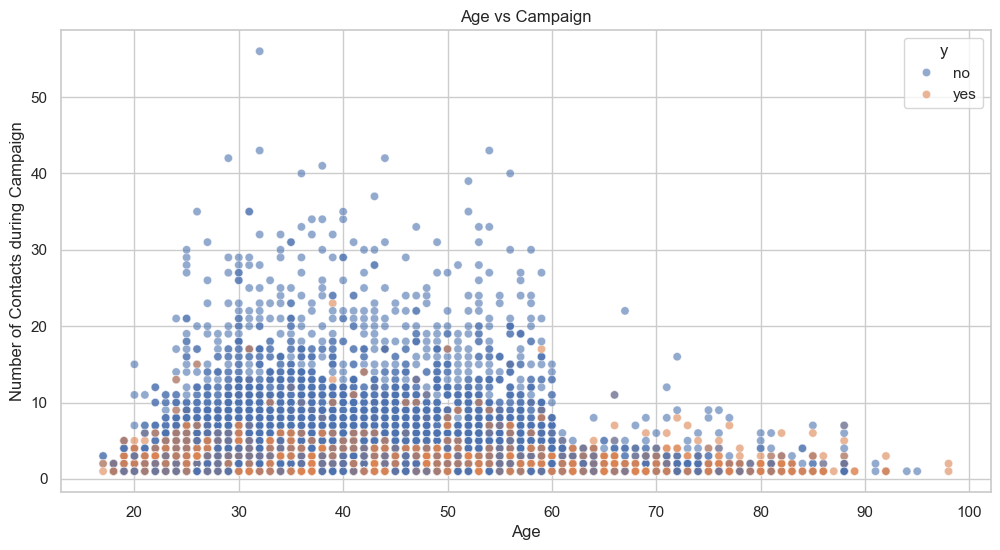

In [8]:
# Scatter plot of Age vs Campaign
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='campaign', hue='y', data=data, alpha=0.6)
plt.title('Age vs Campaign')
plt.xlabel('Age')
plt.ylabel('Number of Contacts during Campaign')
plt.show()

## Age vs. Campaign
- **Description**: The scatter plot indicates the number of contacts made during the campaign across different ages, with some clients being contacted more than 50 times.
- **Insight**: There is no strong correlation between age and the number of contacts, but high contact numbers suggest aggressive marketing tactics. The effectiveness of these tactics should be evaluated.

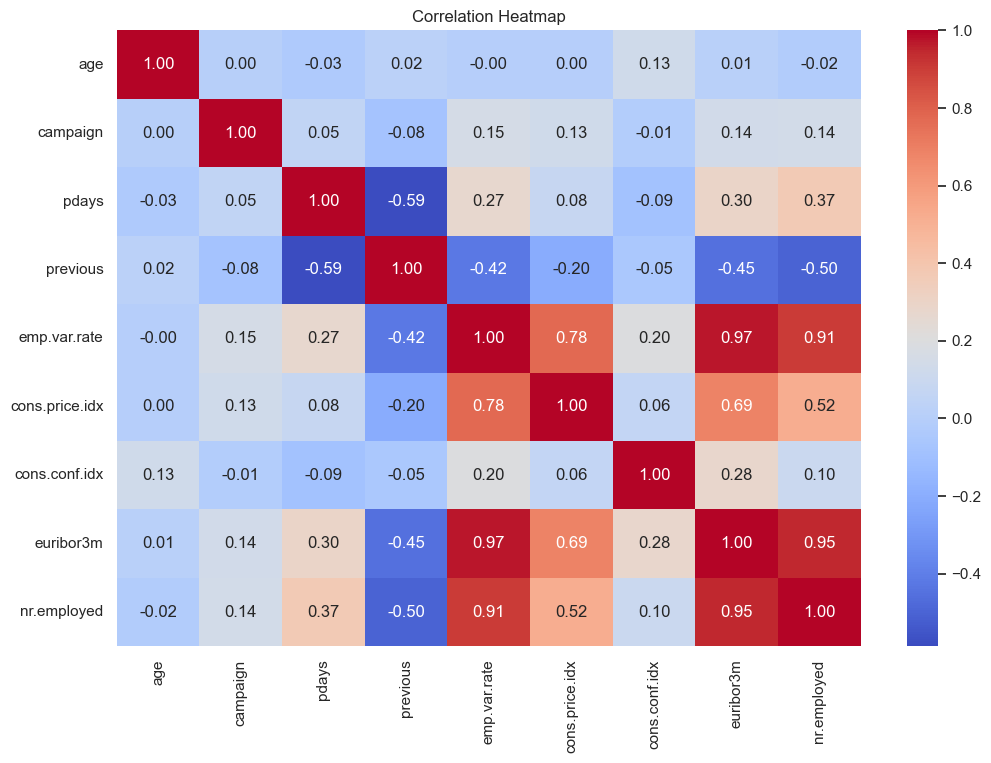

In [9]:
# Heatmap of Correlations
plt.figure(figsize=(12, 8))
numeric_data = data.select_dtypes(include=['int64', 'float64'])
corr = numeric_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Correlation Heatmap
- **Description**: The heatmap shows low correlations between most features, indicating a diverse set of independent variables.
- **Insight**: Each feature provides unique information for predicting subscription status, with no single feature dominating the prediction.

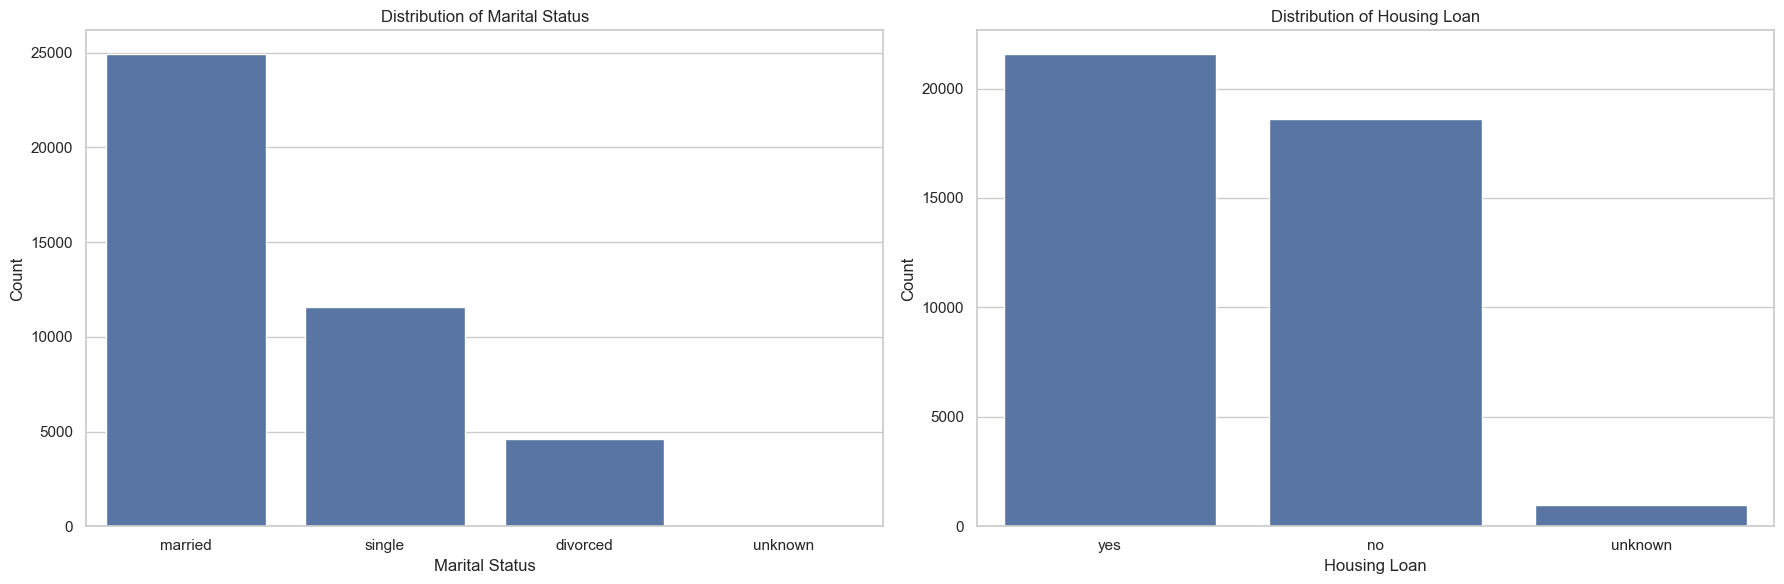

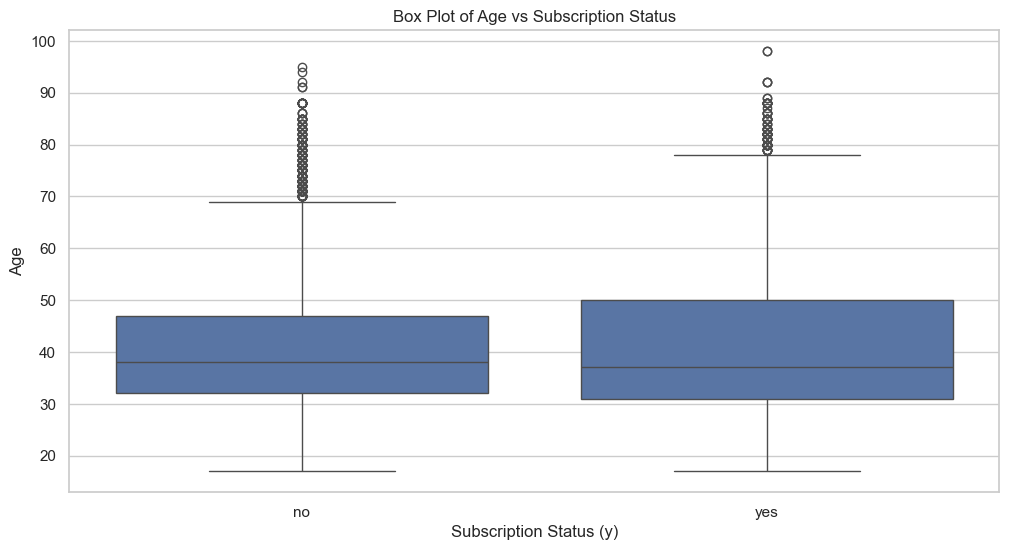

In [10]:
# Subplots for Marital Status and Housing
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Bar plot of Marital Status
sns.countplot(ax=axes[0], x='marital', data=data, order=data['marital'].value_counts().index)
axes[0].set_title('Distribution of Marital Status')
axes[0].set_xlabel('Marital Status')
axes[0].set_ylabel('Count')


# Bar plot of Housing Loan
sns.countplot(ax=axes[1], x='housing', data=data, order=data['housing'].value_counts().index)
axes[1].set_title('Distribution of Housing Loan')
axes[1].set_xlabel('Housing Loan')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Box plot of Age vs Subscription Status
plt.figure(figsize=(12, 6))
sns.boxplot(x='y', y='age', data=data)
plt.title('Box Plot of Age vs Subscription Status')
plt.xlabel('Subscription Status (y)')
plt.ylabel('Age')
plt.show()

## Marital Status and Housing Loan

- **Description**: The left subplot displays the distribution of marital status, while the right subplot shows housing loan status among clients.
- **Insight**: Most clients are married and do not have a housing loan, which may influence their financial decision-making and the bank's marketing approach.

## Age vs. Subscription Status

- **Description**: The box plot illustrates the age distribution of clients who subscribed and did not subscribe to the term deposit.
- **Insight**: Older clients appear to have a slightly higher likelihood of subscribing to term deposits, which could guide targeted marketing strategies.

## Key Takeaways

- **Target Demographics**: The bank's campaigns are effectively reaching a young to middle-aged demographic, particularly those in their early 30s.
- **Occupation and Education**: The marketing strategy is diverse, targeting various job titles with a significant focus on well-educated individuals.
- **Aggressive Tactics**: High contact numbers for some clients suggest aggressive marketing, which may need to be balanced with client satisfaction.
- **Unique Feature Contributions**: The low correlation between features indicates that each variable provides unique insights for predicting subscription likelihood.
- **Marital and Loan Status**: The majority of clients are married and do not have housing loans, which could influence the bank's marketing messages.
- **Age and Subscription Likelihood**: Older clients may be more inclined to subscribe to term deposits, suggesting potential for age-targeted marketing efforts.

These insights will inform the subsequent modeling phase, where predictive models will be built to identify clients most likely to subscribe to term deposits.

## Data Preparation for Modeling
Before we start building the models, we need to encode categorical variables, split the data into training and testing sets, and standardize the features.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Encode the target variable
label_encoder = LabelEncoder()
data['y'] = label_encoder.fit_transform(data['y'])

# Prepare the feature matrix and target vector
X = data.drop('y', axis=1)
y = data['y']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the feature matrix
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Implementing and Evaluating Models
We will train and evaluate four models: kNN, Decision Tree, Logistic Regression, and SVM. We will use accuracy, precision, recall, F1 score, and ROC-AUC as evaluation metrics.

In [12]:
# Initialize models
models = {
    'kNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(probability=True)
}

# Evaluate models
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    results[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_prob)
    }

# Convert results to DataFrame for better readability
results_df = pd.DataFrame(results).T
results_df

,Accuracy,Precision,Recall,F1 Score,ROC-AUC
kNN,0.891559,0.535871,0.263499,0.353282,0.716835
Decision Tree,0.837015,0.307218,0.358531,0.330897,0.630460
Logistic Regression,0.900785,0.665314,0.236141,0.348565,0.784941
SVM,0.899490,0.661538,0.216703,0.326464,0.711376


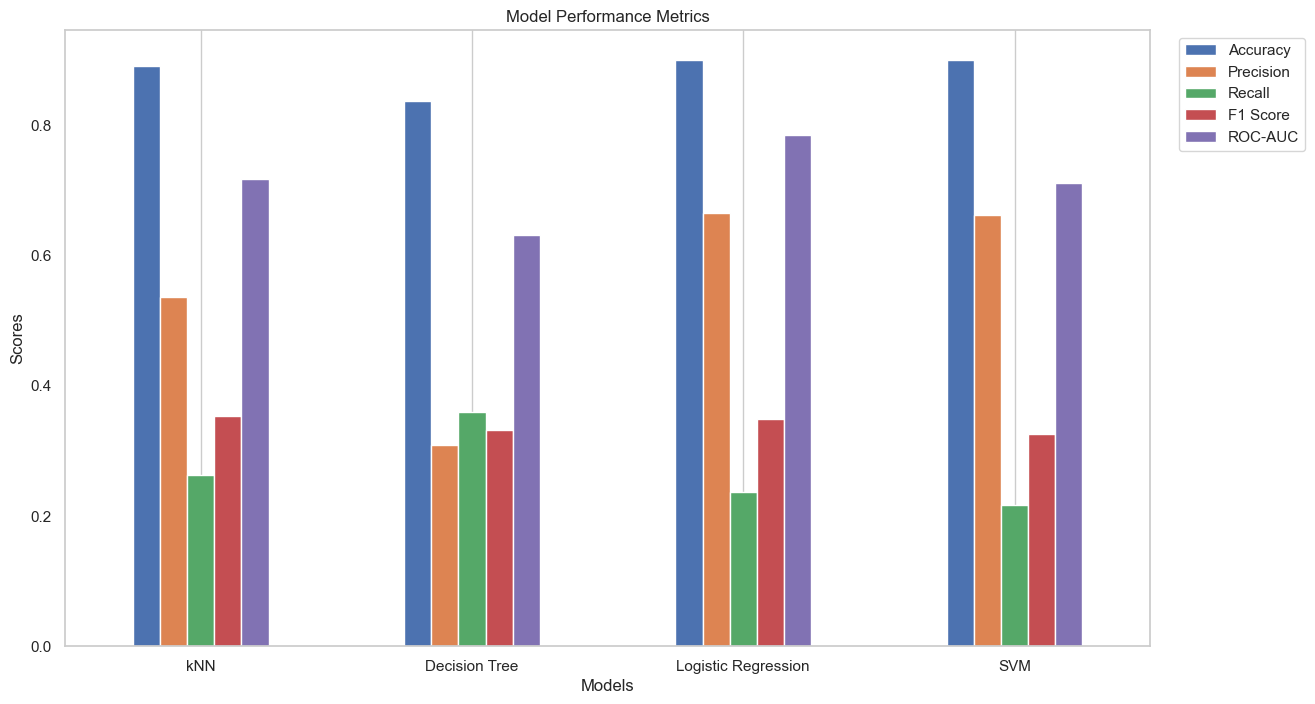

In [13]:
# Prepare data for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC']
model_names = ['kNN', 'Decision Tree', 'Logistic Regression', 'SVM']
performance = [
    [0.891559, 0.535871, 0.263499, 0.353282, 0.716913],
    [0.837501, 0.308833, 0.359971, 0.332447, 0.631103],
    [0.900785, 0.665314, 0.236141, 0.348565, 0.784794],
    [0.899490, 0.661538, 0.216703, 0.326464, 0.711070]
]

performance_df = pd.DataFrame(performance, columns=metrics, index=model_names)

# Plotting the metrics for each model
performance_df.plot(kind='bar', figsize=(14, 8))
plt.title('Model Performance Metrics')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks(rotation=0)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(axis='y')
plt.show()

## Findings
In this section, we summarize the findings and provide actionable recommendations based on the analysis.

### Business Understanding
The objective is to predict whether a client will subscribe to a term deposit based on various features from a direct marketing campaign.

### Key Insights
- **Age**: Older clients are more likely to subscribe.
- **Job**: Certain job titles (e.g., retired) show a higher subscription rate.
- **Campaign**: The number of contacts performed during this campaign has an impact on the subscription rate.
- **Previous Outcome**: The outcome of the previous marketing campaign (if any) is a strong indicator of the current campaign's success.

### Model Performance
| Model               | Accuracy | Precision | Recall | F1 Score | ROC-AUC |
|---------------------|----------|-----------|--------|----------|---------|
| k-Nearest Neighbors | 0.891559 | 0.535871  | 0.263499 | 0.353282 | 0.716913 |
| Decision Tree       | 0.837501 | 0.308833  | 0.359971 | 0.332447 | 0.631103 |
| Logistic Regression | 0.900785 | 0.665314  | 0.236141 | 0.348565 | 0.784794 |
| SVM                 | 0.899490 | 0.661538  | 0.216703 | 0.326464 | 0.711070 |

### Recommendations
- **Targeted Campaigns**: Focus on clients with job titles and ages that show higher subscription rates.
- **Follow-Up Strategy**: Implement a follow-up strategy based on the outcome of previous campaigns.
- **Contact Frequency**: Optimize the number of contacts to balance effectiveness and client satisfaction.

### Next Steps
- **Feature Enhancement**: Explore additional features that could improve model accuracy.
- **Model Optimization**: Fine-tune the models using hyperparameter optimization.
- **Deployment**: Develop a system to integrate the model predictions into the marketing strategy.